In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 839s 890ms/step - categorical_accuracy: 0.1007 - loss: 2.3158 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 768s 818ms/step - categorical_accuracy: 0.1013 - loss: 2.3026 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 973s 1s/step - categorical_accuracy: 0.0986 - loss: 2.3026 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 896s 955ms/step - categorical_accuracy: 0.0992 - loss: 2.3026 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 776s 827ms/step - categorical_accuracy: 0.0994 - loss: 2.3026 - val_categorical_accuracy: 0.1000 - val_loss: 2.3026
313/313 - 38s - 120ms/step - categorical_accuracy: 0.1000 - loss: 2.3026
Точность на тестовых данных: 0.10000000149011612


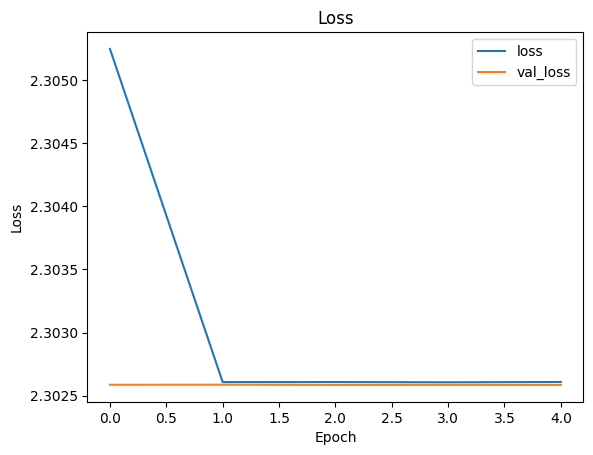

In [34]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(3, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.Resizing(32, 32),

    VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=5,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_acc}")

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [36]:
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_101 (Conv2D)                  │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_75 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_76 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_77 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 1, 1, 3)             │           1,731 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_28 (Resizing)               │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_108 (Dropout)                │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,119,849 (172.12 MB)

 Trainable params: 15,039,949 (57.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,079,900 (114.75 MB)

In [ ]:
# Після навчання можна порівняти точність цієї моделі з багатошаровою нейронною мережею, 
# створеною на попередньому етапі. Очікується,
# що використання VGG16, як глибшої мережі, дасть вищу точність завдяки її здатності витягувати складніші ознаки.
# А ще чекати годину заради 5 епох це прям сок.